## 1. Pobieranie zbioru danych

In [1]:
!pip install --user kaggle

  Using cached kaggle-1.6.6.tar.gz (84 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111961 sha256=3aa19c7655c19d77b65c2542567b6e34a57813227f1f2df6d0fd84accad6824f
  Stored in directory: c:\users\adrian\appdata\local\pip\cache\wheels\46\aa\c3\b3e421522fb5acdd7c366a05c5fc80787615bdeed207e7f79b
Successfully built kaggle


In [2]:
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease/


  0%|          | 0.00/21.4M [00:00<?, ?B/s]
  5%|4         | 1.00M/21.4M [00:00<00:11, 1.80MB/s]
  9%|9         | 2.00M/21.4M [00:00<00:05, 3.51MB/s]
 19%|#8        | 4.00M/21.4M [00:00<00:02, 7.25MB/s]
 33%|###2      | 7.00M/21.4M [00:00<00:01, 12.0MB/s]
 51%|#####1    | 11.0M/21.4M [00:01<00:00, 17.9MB/s]
 65%|######5   | 14.0M/21.4M [00:01<00:00, 20.7MB/s]
 79%|#######9  | 17.0M/21.4M [00:01<00:00, 20.6MB/s]
 93%|#########3| 20.0M/21.4M [00:01<00:00, 22.7MB/s]
100%|##########| 21.4M/21.4M [00:01<00:00, 14.9MB/s]


In [3]:
#!unzip -o personal-key-indicators-of-heart-disease.zip #nie działa na Windowsie więc korzystam z modułu zipfile

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import zipfile
with zipfile.ZipFile("personal-key-indicators-of-heart-disease.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset_extracted")

In [1]:
import pandas as pd
# W pobranym zbiorze danych jest kilka podzbiorów więc celowo otwieram ten z NaN, żeby manualnie go oczyścić dla praktyki
df = pd.read_csv("dataset_extracted/2022/heart_2022_with_nans.csv")

## Przeglądanie nieoczyszczonego datasetu

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [39]:
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             No  ...            NaN   
1         6.0          NaN             No  ...           1.60   
2         5.0          NaN             No  ...           1.57   
3         7.0          NaN             No  ...           1.65   
4         9.0          NaN             No  ...           1.57   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0               NaN    NaN              No         No          Yes   
1             68.04  26.57              No         No           No   
2             63.50  25.61              No         No           No   
3             63.50  23.30              No         No          Yes   
4             53.98  21.77             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No                                                NaN   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]

In [40]:
df.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       434205.000000     436065.000000  439679.000000   416480.000000   
mean             4.347919          4.382649       7.022983        1.702691   
std              8.688912          8.387475       1.502425        0.107177   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      403054.000000  396326.000000  
mean           83.074470      28.529842  
std            21.448173       6.554889  
min            22.680000      12.020000  
25%            68.040000      24.130000  
50%            80.740000      27.440000  
75%            95.250000      31.750000  
max           292.570000      99.640000

#### Tylko 6 kolumn jest numeryczne na razie więc wiele statystyk nie zostaje wyświetlonych w tym podsumowaniu

#### Zbiór danych jest niezbalansowany, zmienna którą chcemy przewidzieć w znacznej większości przypadków wynosi 0:

<AxesSubplot:ylabel='HadHeartAttack'>

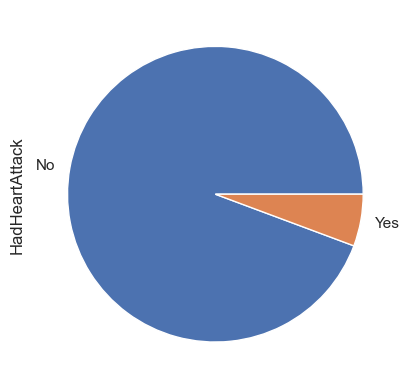

In [41]:
df["HadHeartAttack"].value_counts().plot(kind="pie")

In [42]:
df["HadHeartAttack"].value_counts()

No     416959
Yes     25108
Name: HadHeartAttack, dtype: int64

## 2. Podział na podzbiory (train / dev / test - 8:1:1)) i oversampling

In [43]:
from sklearn.model_selection import train_test_split
#Funkcji z sklearn musimy użyć dwukrotnie, bo dzieli tylko na dwa podzbiory
train, test_and_valid = train_test_split(df, test_size=0.2) #0.8 train, 0.2 test&valid

test, valid = train_test_split(test_and_valid, test_size=0.5) #0.1 test, 0.1 valid

In [44]:
train["HadHeartAttack"].value_counts()

No     333641
Yes     20042
Name: HadHeartAttack, dtype: int64

Zbiór treningowy jest nadal niezbalansowany więc zrobię prosty oversampling przez kopiowanie mniejszej klasy aż będą prawie równe

In [45]:
def oversample(dataset):
    num_true = len(dataset[dataset["HadHeartAttack"]=="Yes"])
    num_false = len(dataset[dataset["HadHeartAttack"]=="No"])
    num_oversampling_steps = num_false//num_true
    oversampled = dataset.copy()
    for x in range(num_oversampling_steps):
        oversampled = pd.concat([oversampled, dataset[dataset["HadHeartAttack"]=="Yes"]], ignore_index=True)
    return oversampled

In [46]:
train = oversample(train)

<AxesSubplot:ylabel='HadHeartAttack'>

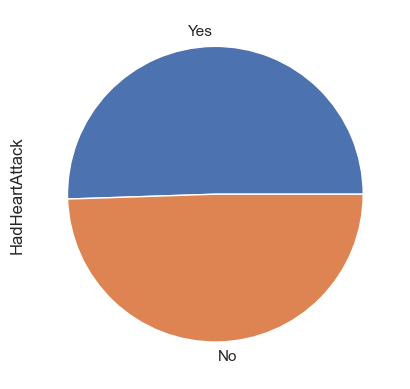

In [47]:
train["HadHeartAttack"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='HadHeartAttack'>

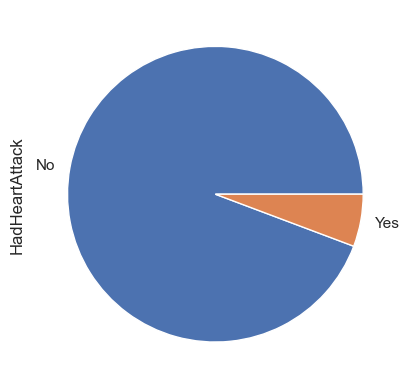

In [48]:
test["HadHeartAttack"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='HadHeartAttack'>

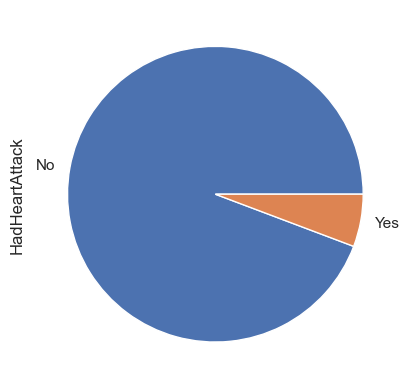

In [49]:
valid["HadHeartAttack"].value_counts().plot(kind="pie")

Proporcje osób palących / niepalących w pierwotnym zbiorze danych:

<AxesSubplot:ylabel='SmokerStatus'>

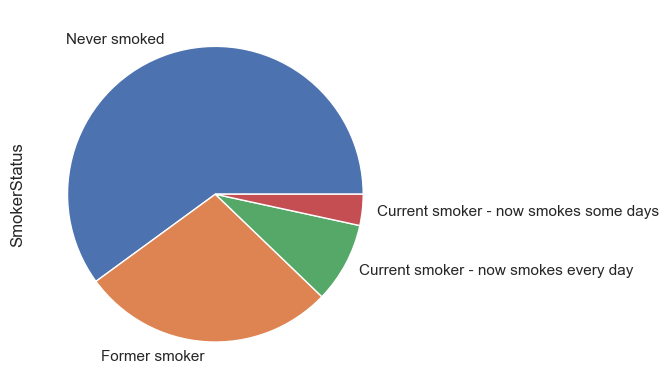

In [50]:
df["SmokerStatus"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='ECigaretteUsage'>

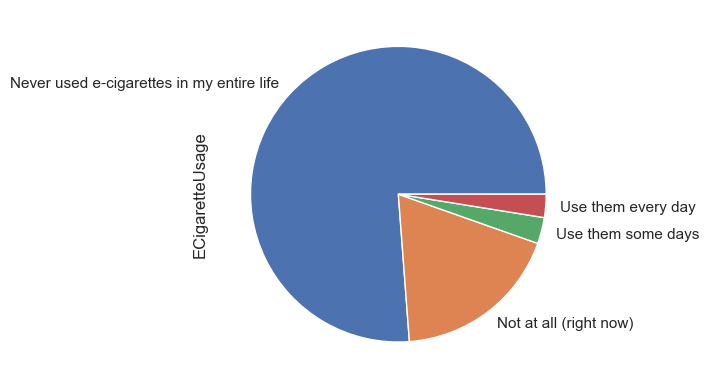

In [51]:
df["ECigaretteUsage"].value_counts().plot(kind="pie")

### Statystyki covidowe

<AxesSubplot:ylabel='CovidPos'>

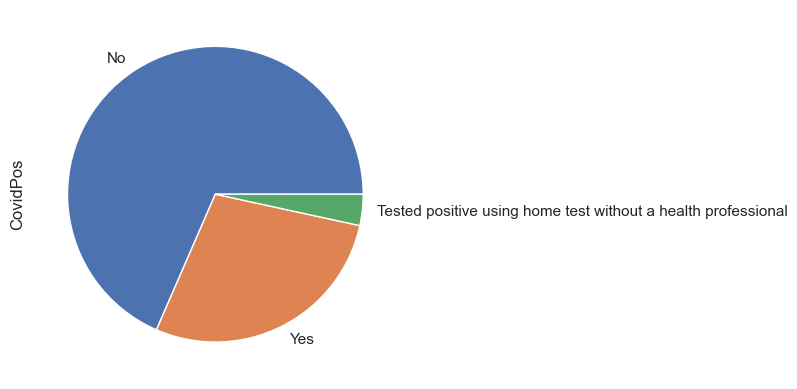

In [52]:
df["CovidPos"].value_counts().plot(kind="pie")

## Normalizacja część 1 - zamiana na kolumny liczbowe i kategoryczne

Kolumny zawierające stan zdrowia i podobne cechy opisane w sposób "poor/fair/good/excellent" etc. starałem się zamienić na liczbowe w sposób sensowny, rosnący względem pozytywnego aspektu tego czynnika zdrowotnego. Podobnie z tym jak często dana osoba paliła.
Część kolumn zamieniłem na kategoryczne
Kolumnę płci zamieniłem na numeryczną w celu późniejszego wykorzystania przez model, choć mialem wątpliwości co do robienia tego pod względem poprawności politycznej


In [53]:
df["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [54]:
df["GeneralHealth"].unique()

array(['Very good', 'Excellent', 'Fair', 'Poor', 'Good', nan],
      dtype=object)

In [55]:
health_map = {
    "Excellent": 5,
    "Very good": 4,
    "Good": 3,
    "Fair": 2,
    "Poor": 1
}

In [56]:
for col in df:
    print(f"{col}:")
    print(df[col].unique())

State:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Sex:
['Female' 'Male']
GeneralHealth:
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
PhysicalHealthDays:
[ 0.  2.  1.  8.  5. 30.  4. 23. 14. nan 15.  3. 10.  7. 25.  6. 21. 20.
 29. 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 19. 18. 22.]
MentalHealthDays:
[ 0.  3.  9.  5. 15. 20. 14. 10. 18.  1. nan  2. 30.  4.  6.  7. 25.  8.
 22. 29. 27. 21. 1

In [57]:
from collections import defaultdict
def normalize_dataset(dataset):
    dataset["GeneralHealth"] = dataset["GeneralHealth"].map(defaultdict(lambda: float('NaN'), health_map), na_action='ignore')
    dataset["Sex"] = dataset["Sex"].map({"Female":0,"Male":1}).astype(float) #Zamiana z kolumn tekstowych na numeryczne
    dataset.rename(columns ={"Sex":"Male"},inplace=True)
    dataset["State"] = dataset["State"].astype('category')
    dataset["PhysicalHealthDays"].astype(float)
    dataset["MentalHealthDays"].astype(float)
    dataset["LastCheckupTime"] = dataset["LastCheckupTime"].fillna("Unknown").astype('category') # Potem korzystam z fillna-->median ale nie działa to na kolumnach kategorycznych więc wykonuję to przed konwersją
    dataset["PhysicalActivities"]= dataset["PhysicalActivities"].map({"No":0,"Yes":1})
    dataset["SleepHours"].astype(float)
    dataset["RemovedTeeth"] = dataset["RemovedTeeth"].map(defaultdict(lambda: float('NaN'), {"None of them":0,"1 to 5":1, "6 or more, but not all":2, "All":3}), na_action='ignore')
    dataset["HadHeartAttack"]= dataset["HadHeartAttack"].map({"No":0,"Yes":1})
    dataset["HadAngina"]= dataset["HadAngina"].map({"No":0,"Yes":1})
    dataset["HadStroke"]= dataset["HadStroke"].map({"No":0,"Yes":1})
    dataset["HadAsthma"]= dataset["HadAsthma"].map({"No":0,"Yes":1})
    dataset["HadSkinCancer"]= dataset["HadSkinCancer"].map({"No":0,"Yes":1})
    dataset["HadCOPD"]= dataset["HadCOPD"].map({"No":0,"Yes":1})
    dataset["HadDepressiveDisorder"]= dataset["HadDepressiveDisorder"].map({"No":0,"Yes":1})
    dataset["HadKidneyDisease"]= dataset["HadKidneyDisease"].map({"No":0,"Yes":1})
    dataset["HadArthritis"]= dataset["HadArthritis"].map({"No":0,"Yes":1})
    dataset["HadDiabetes"]= dataset["HadDiabetes"].map({"No":0,"Yes, but only during pregnancy (female)":1,"No, pre-diabetes or borderline diabetes":2,"Yes":3})

    dataset["DeafOrHardOfHearing"]= dataset["DeafOrHardOfHearing"].map({"No":0,"Yes":1})
    dataset["BlindOrVisionDifficulty"]= dataset["BlindOrVisionDifficulty"].map({"No":0,"Yes":1})
    dataset["DifficultyConcentrating"]= dataset["DifficultyConcentrating"].map({"No":0,"Yes":1})
    dataset["DifficultyWalking"]= dataset["DifficultyWalking"].map({"No":0,"Yes":1})
    dataset["DifficultyDressingBathing"]= dataset["DifficultyDressingBathing"].map({"No":0,"Yes":1})
    dataset["DifficultyErrands"]= dataset["DifficultyErrands"].map({"No":0,"Yes":1})
    dataset["SmokerStatus"]= dataset["SmokerStatus"].map({"Never smoked":0,"Current smoker - now smokes some days":1,"Former smoker":2,"Current smoker - now smokes every day":3})
    dataset["ECigaretteUsage"]= dataset["ECigaretteUsage"].map({"Never used e-cigarettes in my entire life":0,"Not at all (right now)":1,"Use them some days":2,"Use them every day":3})
    dataset["ChestScan"]= dataset["ChestScan"].map({"No":0,"Yes":1})
    dataset["RaceEthnicityCategory"] = dataset["RaceEthnicityCategory"].fillna("Unknown").astype('category')
    dataset["AgeCategory"] = dataset["AgeCategory"].fillna("Unknown").astype('category')
    dataset["HeightInMeters"] = dataset["HeightInMeters"].astype(float)
    dataset["WeightInKilograms"] = dataset["WeightInKilograms"].astype(float)
    dataset["BMI"] = dataset["BMI"].astype(float)
    dataset["AlcoholDrinkers"]= dataset["AlcoholDrinkers"].map({"No":0,"Yes":1})
    dataset["HIVTesting"]= dataset["HIVTesting"].map({"No":0,"Yes":1})
    dataset["FluVaxLast12"]= dataset["FluVaxLast12"].map({"No":0,"Yes":1})
    dataset["PneumoVaxEver"]= dataset["PneumoVaxEver"].map({"No":0,"Yes":1})
    dataset["TetanusLast10Tdap"]= dataset["TetanusLast10Tdap"].apply(lambda x: float('NaN') if type(x)!=str else 1.0 if 'Yes,' in x else 1.0 if 'No,' in x else float('NaN'))
    dataset["HighRiskLastYear"]= dataset["HighRiskLastYear"].map({"No":0,"Yes":1})
    dataset["CovidPos"]= dataset["CovidPos"].map({"No":0,"Yes":1})

### Zbiór test przed zmianą typu danych

In [58]:
test.head()

State     Sex GeneralHealth  PhysicalHealthDays  \
339824  South Dakota  Female          Good                 3.0   
127927        Kansas  Female          Good                30.0   
362523          Utah    Male     Excellent                 0.0   
183687      Michigan    Male          Good                 0.0   
191905      Michigan  Female     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
339824              21.0  Within past year (anytime less than 12 months ...   
127927               0.0  Within past year (anytime less than 12 months ...   
362523               0.0  Within past year (anytime less than 12 months ...   
183687               7.0  Within past year (anytime less than 12 months ...   
191905               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
339824                Yes         8.0  6 or more, but not all             No   
127927                Yes        10.0                  1 to 5             No   
362523                Yes         7.0                  1 to 5             No   
183687                Yes         8.0            None of them             No   
191905                Yes         7.0            None of them             No   

        ... HeightInMeters WeightInKilograms    BMI AlcoholDrinkers  \
339824  ...           1.60             52.16  20.37              No   
127927  ...           1.68             97.52  34.70              No   
362523  ...           1.83            113.85  34.04              No   
183687  ...           1.78             83.91  26.54             Yes   
191905  ...           1.57             68.04  27.44             Yes   

       HIVTesting FluVaxLast12 PneumoVaxEver  \
339824        Yes          Yes           Yes   
127927         No          Yes           Yes   
362523         No           No            No   
183687         No          Yes           Yes   
191905        Yes           No           Yes   

                                        TetanusLast10Tdap HighRiskLastYear  \
339824                                 Yes, received Tdap               No   
127927                                                NaN               No   
362523                                 Yes, received Tdap               No   
183687                                 Yes, received Tdap               No   
191905  Yes, received tetanus shot but not sure what type               No   

       CovidPos  
339824       No  
127927       No  
362523      Yes  
183687       No  
191905       No  

[5 rows x 40 columns]

## Zbiór test po zmianie typu danych

In [59]:
normalize_dataset(test)
test.head()

State  Male  GeneralHealth  PhysicalHealthDays  \
339824  South Dakota   0.0            3.0                 3.0   
127927        Kansas   0.0            3.0                30.0   
362523          Utah   1.0            5.0                 0.0   
183687      Michigan   1.0            3.0                 0.0   
191905      Michigan   0.0            4.0                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
339824              21.0  Within past year (anytime less than 12 months ...   
127927               0.0  Within past year (anytime less than 12 months ...   
362523               0.0  Within past year (anytime less than 12 months ...   
183687               7.0  Within past year (anytime less than 12 months ...   
191905               0.0  Within past year (anytime less than 12 months ...   

        PhysicalActivities  SleepHours  RemovedTeeth  HadHeartAttack  ...  \
339824                 1.0         8.0           2.0             0.0  ...   
127927                 1.0        10.0           1.0             0.0  ...   
362523                 1.0         7.0           1.0             0.0  ...   
183687                 1.0         8.0           0.0             0.0  ...   
191905                 1.0         7.0           0.0             0.0  ...   

        HeightInMeters  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
339824            1.60              52.16  20.37              0.0         1.0   
127927            1.68              97.52  34.70              0.0         0.0   
362523            1.83             113.85  34.04              0.0         0.0   
183687            1.78              83.91  26.54              1.0         0.0   
191905            1.57              68.04  27.44              1.0         1.0   

        FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  \
339824           1.0            1.0                1.0               0.0   
127927           1.0            1.0                NaN               0.0   
362523           0.0            0.0                1.0               0.0   
183687           1.0            1.0                1.0               0.0   
191905           0.0            1.0                1.0               0.0   

        CovidPos  
339824       0.0  
127927       0.0  
362523       1.0  
183687       0.0  
191905       0.0  

[5 rows x 40 columns]

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44513 entries, 339824 to 52161
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   State                      44513 non-null  category
 1   Male                       44513 non-null  float64 
 2   GeneralHealth              44393 non-null  float64 
 3   PhysicalHealthDays         43469 non-null  float64 
 4   MentalHealthDays           43622 non-null  float64 
 5   LastCheckupTime            44513 non-null  category
 6   PhysicalActivities         44408 non-null  float64 
 7   SleepHours                 44008 non-null  float64 
 8   RemovedTeeth               43413 non-null  float64 
 9   HadHeartAttack             44182 non-null  float64 
 10  HadAngina                  44074 non-null  float64 
 11  HadStroke                  44368 non-null  float64 
 12  HadAsthma                  44339 non-null  float64 
 13  HadSkinCancer             

In [61]:
normalize_dataset(train)
normalize_dataset(valid)

## Statystyki dla zbiorów po zamianie na kolumny numeryczne

*50. centyl to mediana*

In [62]:
train.describe()

Male  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
count  676777.000000  674433.000000       655630.000000     660417.000000   
mean        0.538139       3.055519            6.737547          4.863972   
std         0.498544       1.137862           10.713287          9.115863   
min         0.000000       1.000000            0.000000          0.000000   
25%         0.000000       2.000000            0.000000          0.000000   
50%         1.000000       3.000000            0.000000          0.000000   
75%         1.000000       4.000000           10.000000          5.000000   
max         1.000000       5.000000           30.000000         30.000000   

       PhysicalActivities     SleepHours   RemovedTeeth  HadHeartAttack  \
count       674814.000000  665609.000000  654359.000000   674355.000000   
mean             0.690146       7.032336       0.983081        0.505244   
std              0.462434       1.726387       1.019679        0.499973   
min              0.000000       1.000000       0.000000        0.000000   
25%              0.000000       6.000000       0.000000        0.000000   
50%              1.000000       7.000000       1.000000        1.000000   
75%              1.000000       8.000000       2.000000        1.000000   
max              1.000000      24.000000       3.000000        1.000000   

           HadAngina      HadStroke  ...  HeightInMeters  WeightInKilograms  \
count  657726.000000  672927.000000  ...   637313.000000      619546.000000   
mean        0.264549       0.117193  ...        1.707193          84.657015   
std         0.441093       0.321650  ...        0.108002          21.753692   
min         0.000000       0.000000  ...        0.910000          22.680000   
25%         0.000000       0.000000  ...        1.630000          69.400000   
50%         0.000000       0.000000  ...        1.700000          81.650000   
75%         1.000000       0.000000  ...        1.780000          96.160000   
max         1.000000       1.000000  ...        2.410000         292.570000   

                 BMI  AlcoholDrinkers     HIVTesting   FluVaxLast12  \
count  611024.000000    606636.000000  572562.000000  605920.000000   
mean       28.917363         0.456819       0.325787       0.569879   
std         6.607455         0.498132       0.468668       0.495093   
min        12.050000         0.000000       0.000000       0.000000   
25%        24.410000         0.000000       0.000000       0.000000   
50%        27.890000         0.000000       0.000000       1.000000   
75%        32.260000         1.000000       1.000000       1.000000   
max        97.650000         1.000000       1.000000       1.000000   

       PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear       CovidPos  
count  570114.000000           554467.0     600540.000000  585150.000000  
mean        0.527672                1.0          0.035087       0.273055  
std         0.499234                0.0          0.183999       0.445529  
min         0.000000                1.0          0.000000       0.000000  
25%         0.000000                1.0          0.000000       0.000000  
50%         1.000000                1.0          0.000000       0.000000  
75%         1.000000                1.0          0.000000       1.000000  
max         1.000000                1.0          1.000000       1.000000  

[8 rows x 36 columns]

In [63]:
test.describe()

Male  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
count  44513.000000   44393.000000        43469.000000      43622.000000   
mean       0.471593       3.441511            4.275001          4.298221   
std        0.499198       1.050924            8.588663          8.299250   
min        0.000000       1.000000            0.000000          0.000000   
25%        0.000000       3.000000            0.000000          0.000000   
50%        0.000000       3.000000            0.000000          0.000000   
75%        1.000000       4.000000            3.000000          4.000000   
max        1.000000       5.000000           30.000000         30.000000   

       PhysicalActivities    SleepHours  RemovedTeeth  HadHeartAttack  \
count        44408.000000  44008.000000  43413.000000    44182.000000   
mean             0.760021      7.036584      0.685302        0.057241   
std              0.427075      1.512667      0.884912        0.232304   
min              0.000000      1.000000      0.000000        0.000000   
25%              1.000000      6.000000      0.000000        0.000000   
50%              1.000000      7.000000      0.000000        0.000000   
75%              1.000000      8.000000      1.000000        0.000000   
max              1.000000     24.000000      3.000000        1.000000   

          HadAngina     HadStroke  ...  HeightInMeters  WeightInKilograms  \
count  44074.000000  44368.000000  ...    41714.000000       40397.000000   
mean       0.061056      0.042869  ...        1.703194          83.021746   
std        0.239436      0.202563  ...        0.107438          21.551394   
min        0.000000      0.000000  ...        0.910000          22.680000   
25%        0.000000      0.000000  ...        1.630000          68.040000   
50%        0.000000      0.000000  ...        1.700000          80.740000   
75%        0.000000      0.000000  ...        1.780000          95.250000   
max        1.000000      1.000000  ...        2.340000         290.300000   

                BMI  AlcoholDrinkers    HIVTesting  FluVaxLast12  \
count  39724.000000     39956.000000  38018.000000  39886.000000   
mean      28.512326         0.529532      0.342233      0.527002   
std        6.596149         0.499133      0.474463      0.499277   
min       12.020000         0.000000      0.000000      0.000000   
25%       24.030000         0.000000      0.000000      0.000000   
50%       27.410000         1.000000      0.000000      1.000000   
75%       31.650000         1.000000      1.000000      1.000000   
max       97.650000         1.000000      1.000000      1.000000   

       PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear      CovidPos  
count   36860.000000            36315.0      39538.000000  38114.000000  
mean        0.413592                1.0          0.043427      0.289500  
std         0.492484                0.0          0.203818      0.453536  
min         0.000000                1.0          0.000000      0.000000  
25%         0.000000                1.0          0.000000      0.000000  
50%         0.000000                1.0          0.000000      0.000000  
75%         1.000000                1.0          0.000000      1.000000  
max         1.000000                1.0          1.000000      1.000000  

[8 rows x 36 columns]

In [64]:
valid.describe()

Male  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
count  44514.000000   44388.000000        43458.000000      43578.000000   
mean       0.469043       3.434554            4.355470          4.379022   
std        0.499046       1.051996            8.718506          8.383576   
min        0.000000       1.000000            0.000000          0.000000   
25%        0.000000       3.000000            0.000000          0.000000   
50%        0.000000       3.000000            0.000000          0.000000   
75%        1.000000       4.000000            3.000000          5.000000   
max        1.000000       5.000000           30.000000         30.000000   

       PhysicalActivities    SleepHours  RemovedTeeth  HadHeartAttack  \
count        44401.000000  43966.000000  43360.000000    44202.000000   
mean             0.758361      7.013010      0.684732        0.057396   
std              0.428081      1.491967      0.882396        0.232600   
min              0.000000      1.000000      0.000000        0.000000   
25%              1.000000      6.000000      0.000000        0.000000   
50%              1.000000      7.000000      0.000000        0.000000   
75%              1.000000      8.000000      1.000000        0.000000   
max              1.000000     24.000000      3.000000        1.000000   

          HadAngina     HadStroke  ...  HeightInMeters  WeightInKilograms  \
count  44031.000000  44344.000000  ...    41677.000000       40327.000000   
mean       0.058936      0.042463  ...        1.702146          82.981070   
std        0.235507      0.201646  ...        0.106978          21.512676   
min        0.000000      0.000000  ...        0.910000          22.680000   
25%        0.000000      0.000000  ...        1.630000          68.040000   
50%        0.000000      0.000000  ...        1.700000          79.830000   
75%        0.000000      0.000000  ...        1.780000          95.250000   
max        1.000000      1.000000  ...        2.360000         263.080000   

                BMI  AlcoholDrinkers    HIVTesting  FluVaxLast12  \
count  39626.000000     39950.000000  38041.000000  39885.000000   
mean      28.521370         0.527910      0.342525      0.525285   
std        6.622255         0.499227      0.474560      0.499367   
min       12.160000         0.000000      0.000000      0.000000   
25%       24.030000         0.000000      0.000000      0.000000   
50%       27.400000         1.000000      0.000000      1.000000   
75%       31.750000         1.000000      1.000000      1.000000   
max       99.640000         1.000000      1.000000      1.000000   

       PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear      CovidPos  
count   36926.000000            36250.0      39535.000000  38212.000000  
mean        0.412771                1.0          0.044846      0.291872  
std         0.492339                0.0          0.206969      0.454630  
min         0.000000                1.0          0.000000      0.000000  
25%         0.000000                1.0          0.000000      0.000000  
50%         0.000000                1.0          0.000000      0.000000  
75%         1.000000                1.0          0.000000      1.000000  
max         1.000000                1.0          1.000000      1.000000  

[8 rows x 36 columns]

#### Wydaje się być korelacja między masą ciała i zawałem:

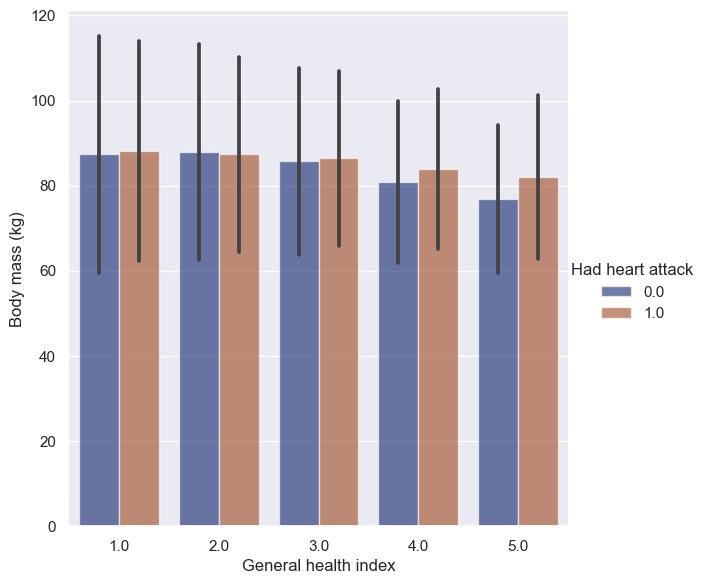

In [65]:
import seaborn as sns
sns.set_theme()
g = sns.catplot(
    data=train, kind="bar",
    x="GeneralHealth", y="WeightInKilograms", hue="HadHeartAttack",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("General health index", "Body mass (kg)")
g.legend.set_title("Had heart attack")

### Osoby palące częsciej miały zawał:

In [66]:
valid.groupby('SmokerStatus', as_index=False)['HadHeartAttack'].mean()

SmokerStatus  HadHeartAttack
0           0.0        0.037883
1           1.0        0.072598
2           2.0        0.088887
3           3.0        0.090192

### Osoby z gorszym wskaźnikiem "GeneralHealth" w tym zbiorze danych częściej miały zawał:

In [67]:
valid.groupby('GeneralHealth', as_index=False)['HadHeartAttack'].mean()

GeneralHealth  HadHeartAttack
0            1.0        0.228411
1            2.0        0.129270
2            3.0        0.056693
3            4.0        0.027336
4            5.0        0.014743

In [68]:
valid.pivot_table('HadHeartAttack',index='GeneralHealth', columns='SmokerStatus')

SmokerStatus        0.0       1.0       2.0       3.0
GeneralHealth                                        
1.0            0.194640  0.310680  0.257100  0.222222
2.0            0.090772  0.146429  0.184443  0.155059
3.0            0.039989  0.031068  0.091645  0.060469
4.0            0.021611  0.032070  0.035265  0.048292
5.0            0.011078  0.012579  0.026298  0.018315

## Normalizacja część 2 - Skalowanie kolumn numerycznych do 0-1

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def scale_float_columns(dataset):
    numerical_columns = list(dataset.select_dtypes(include=['float64']).columns)
    dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [70]:
test.head()

State  Male  GeneralHealth  PhysicalHealthDays  \
339824  South Dakota   0.0            3.0                 3.0   
127927        Kansas   0.0            3.0                30.0   
362523          Utah   1.0            5.0                 0.0   
183687      Michigan   1.0            3.0                 0.0   
191905      Michigan   0.0            4.0                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
339824              21.0  Within past year (anytime less than 12 months ...   
127927               0.0  Within past year (anytime less than 12 months ...   
362523               0.0  Within past year (anytime less than 12 months ...   
183687               7.0  Within past year (anytime less than 12 months ...   
191905               0.0  Within past year (anytime less than 12 months ...   

        PhysicalActivities  SleepHours  RemovedTeeth  HadHeartAttack  ...  \
339824                 1.0         8.0           2.0             0.0  ...   
127927                 1.0        10.0           1.0             0.0  ...   
362523                 1.0         7.0           1.0             0.0  ...   
183687                 1.0         8.0           0.0             0.0  ...   
191905                 1.0         7.0           0.0             0.0  ...   

        HeightInMeters  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
339824            1.60              52.16  20.37              0.0         1.0   
127927            1.68              97.52  34.70              0.0         0.0   
362523            1.83             113.85  34.04              0.0         0.0   
183687            1.78              83.91  26.54              1.0         0.0   
191905            1.57              68.04  27.44              1.0         1.0   

        FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  \
339824           1.0            1.0                1.0               0.0   
127927           1.0            1.0                NaN               0.0   
362523           0.0            0.0                1.0               0.0   
183687           1.0            1.0                1.0               0.0   
191905           0.0            1.0                1.0               0.0   

        CovidPos  
339824       0.0  
127927       0.0  
362523       1.0  
183687       0.0  
191905       0.0  

[5 rows x 40 columns]

In [71]:
scale_float_columns(test)
scale_float_columns(train)
scale_float_columns(valid)
test.head()

State  Male  GeneralHealth  PhysicalHealthDays  \
339824  South Dakota   0.0           0.50                 0.1   
127927        Kansas   0.0           0.50                 1.0   
362523          Utah   1.0           1.00                 0.0   
183687      Michigan   1.0           0.50                 0.0   
191905      Michigan   0.0           0.75                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
339824          0.700000  Within past year (anytime less than 12 months ...   
127927          0.000000  Within past year (anytime less than 12 months ...   
362523          0.000000  Within past year (anytime less than 12 months ...   
183687          0.233333  Within past year (anytime less than 12 months ...   
191905          0.000000  Within past year (anytime less than 12 months ...   

        PhysicalActivities  SleepHours  RemovedTeeth  HadHeartAttack  ...  \
339824                 1.0    0.304348      0.666667             0.0  ...   
127927                 1.0    0.391304      0.333333             0.0  ...   
362523                 1.0    0.260870      0.333333             0.0  ...   
183687                 1.0    0.304348      0.000000             0.0  ...   
191905                 1.0    0.260870      0.000000             0.0  ...   

        HeightInMeters  WeightInKilograms       BMI  AlcoholDrinkers  \
339824        0.482517           0.110156  0.097513              0.0   
127927        0.538462           0.279650  0.264860              0.0   
362523        0.643357           0.340670  0.257153              0.0   
183687        0.608392           0.228795  0.169567              1.0   
191905        0.461538           0.169494  0.180077              1.0   

        HIVTesting  FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  \
339824         1.0           1.0            1.0                0.0   
127927         0.0           1.0            1.0                NaN   
362523         0.0           0.0            0.0                0.0   
183687         0.0           1.0            1.0                0.0   
191905         1.0           0.0            1.0                0.0   

        HighRiskLastYear  CovidPos  
339824               0.0       0.0  
127927               0.0       0.0  
362523               0.0       1.0  
183687               0.0       0.0  
191905               0.0       0.0  

[5 rows x 40 columns]

## 5. Czyszczenie brakujących pól

Nie możemy użyć .dropna() gdyż większość wierszy ma brakujące wartości:

In [72]:
print(df.shape[0])
print(df.shape[0] - df.dropna().shape[0])

445132
199110


In [73]:
test.head()

State  Male  GeneralHealth  PhysicalHealthDays  \
339824  South Dakota   0.0           0.50                 0.1   
127927        Kansas   0.0           0.50                 1.0   
362523          Utah   1.0           1.00                 0.0   
183687      Michigan   1.0           0.50                 0.0   
191905      Michigan   0.0           0.75                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
339824          0.700000  Within past year (anytime less than 12 months ...   
127927          0.000000  Within past year (anytime less than 12 months ...   
362523          0.000000  Within past year (anytime less than 12 months ...   
183687          0.233333  Within past year (anytime less than 12 months ...   
191905          0.000000  Within past year (anytime less than 12 months ...   

        PhysicalActivities  SleepHours  RemovedTeeth  HadHeartAttack  ...  \
339824                 1.0    0.304348      0.666667             0.0  ...   
127927                 1.0    0.391304      0.333333             0.0  ...   
362523                 1.0    0.260870      0.333333             0.0  ...   
183687                 1.0    0.304348      0.000000             0.0  ...   
191905                 1.0    0.260870      0.000000             0.0  ...   

        HeightInMeters  WeightInKilograms       BMI  AlcoholDrinkers  \
339824        0.482517           0.110156  0.097513              0.0   
127927        0.538462           0.279650  0.264860              0.0   
362523        0.643357           0.340670  0.257153              0.0   
183687        0.608392           0.228795  0.169567              1.0   
191905        0.461538           0.169494  0.180077              1.0   

        HIVTesting  FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  \
339824         1.0           1.0            1.0                0.0   
127927         0.0           1.0            1.0                NaN   
362523         0.0           0.0            0.0                0.0   
183687         0.0           1.0            1.0                0.0   
191905         1.0           0.0            1.0                0.0   

        HighRiskLastYear  CovidPos  
339824               0.0       0.0  
127927               0.0       0.0  
362523               0.0       1.0  
183687               0.0       0.0  
191905               0.0       0.0  

[5 rows x 40 columns]

Uzupełniam brakujące wartości medianą:

In [74]:
#test.dropna(inplace=True)
#train.dropna(inplace=True)
#valid.dropna(inplace=True)
test.fillna(test.median(),inplace=True)
train.fillna(train.median(),inplace=True)
valid.fillna(valid.median(),inplace=True)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_18732\896322512.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.median(),inplace=True)
C:\Users\Adrian\AppData\Local\Temp\ipykernel_18732\896322512.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.median(),inplace=True)
C:\Users\Adrian\AppData\Local\Temp\ipykernel_18732\896322512.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  valid.fillna(valid.median(),inplace=True)


In [75]:
test.head()

State  Male  GeneralHealth  PhysicalHealthDays  \
339824  South Dakota   0.0           0.50                 0.1   
127927        Kansas   0.0           0.50                 1.0   
362523          Utah   1.0           1.00                 0.0   
183687      Michigan   1.0           0.50                 0.0   
191905      Michigan   0.0           0.75                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
339824          0.700000  Within past year (anytime less than 12 months ...   
127927          0.000000  Within past year (anytime less than 12 months ...   
362523          0.000000  Within past year (anytime less than 12 months ...   
183687          0.233333  Within past year (anytime less than 12 months ...   
191905          0.000000  Within past year (anytime less than 12 months ...   

        PhysicalActivities  SleepHours  RemovedTeeth  HadHeartAttack  ...  \
339824                 1.0    0.304348      0.666667             0.0  ...   
127927                 1.0    0.391304      0.333333             0.0  ...   
362523                 1.0    0.260870      0.333333             0.0  ...   
183687                 1.0    0.304348      0.000000             0.0  ...   
191905                 1.0    0.260870      0.000000             0.0  ...   

        HeightInMeters  WeightInKilograms       BMI  AlcoholDrinkers  \
339824        0.482517           0.110156  0.097513              0.0   
127927        0.538462           0.279650  0.264860              0.0   
362523        0.643357           0.340670  0.257153              0.0   
183687        0.608392           0.228795  0.169567              1.0   
191905        0.461538           0.169494  0.180077              1.0   

        HIVTesting  FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  \
339824         1.0           1.0            1.0                0.0   
127927         0.0           1.0            1.0                0.0   
362523         0.0           0.0            0.0                0.0   
183687         0.0           1.0            1.0                0.0   
191905         1.0           0.0            1.0                0.0   

        HighRiskLastYear  CovidPos  
339824               0.0       0.0  
127927               0.0       0.0  
362523               0.0       1.0  
183687               0.0       0.0  
191905               0.0       0.0  

[5 rows x 40 columns]

Kolumny kategoryczne wypełniłem w czasie normalizacji wartościami "Unknown" ponieważ fillna-->median nie działa dla tego typu danych
(https://stackoverflow.com/questions/49127897/python-pandas-fillna-median-not-working)

In [76]:
test["HighRiskLastYear"].value_counts()

0.0    42796
1.0     1717
Name: HighRiskLastYear, dtype: int64

In [77]:
test["HighRiskLastYear"].isna().sum()

0

### Brak wartości non-null:

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44513 entries, 339824 to 52161
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   State                      44513 non-null  category
 1   Male                       44513 non-null  float64 
 2   GeneralHealth              44513 non-null  float64 
 3   PhysicalHealthDays         44513 non-null  float64 
 4   MentalHealthDays           44513 non-null  float64 
 5   LastCheckupTime            44513 non-null  category
 6   PhysicalActivities         44513 non-null  float64 
 7   SleepHours                 44513 non-null  float64 
 8   RemovedTeeth               44513 non-null  float64 
 9   HadHeartAttack             44513 non-null  float64 
 10  HadAngina                  44513 non-null  float64 
 11  HadStroke                  44513 non-null  float64 
 12  HadAsthma                  44513 non-null  float64 
 13  HadSkinCancer             

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676777 entries, 0 to 676776
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      676777 non-null  category
 1   Male                       676777 non-null  float64 
 2   GeneralHealth              676777 non-null  float64 
 3   PhysicalHealthDays         676777 non-null  float64 
 4   MentalHealthDays           676777 non-null  float64 
 5   LastCheckupTime            676777 non-null  category
 6   PhysicalActivities         676777 non-null  float64 
 7   SleepHours                 676777 non-null  float64 
 8   RemovedTeeth               676777 non-null  float64 
 9   HadHeartAttack             676777 non-null  float64 
 10  HadAngina                  676777 non-null  float64 
 11  HadStroke                  676777 non-null  float64 
 12  HadAsthma                  676777 non-null  float64 
 13  HadSkinCancer 

In [80]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44514 entries, 66965 to 224311
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   State                      44514 non-null  category
 1   Male                       44514 non-null  float64 
 2   GeneralHealth              44514 non-null  float64 
 3   PhysicalHealthDays         44514 non-null  float64 
 4   MentalHealthDays           44514 non-null  float64 
 5   LastCheckupTime            44514 non-null  category
 6   PhysicalActivities         44514 non-null  float64 
 7   SleepHours                 44514 non-null  float64 
 8   RemovedTeeth               44514 non-null  float64 
 9   HadHeartAttack             44514 non-null  float64 
 10  HadAngina                  44514 non-null  float64 
 11  HadStroke                  44514 non-null  float64 
 12  HadAsthma                  44514 non-null  float64 
 13  HadSkinCancer             